# PROYECT SETUP

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# LOADING AND EXPLORING DATA 

In [5]:
df = pd.read_csv(r"...\creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print("Dataframe shape:", df.shape)

Dataframe shape: (284807, 31)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# EXPLORATORY ANALYSIS 

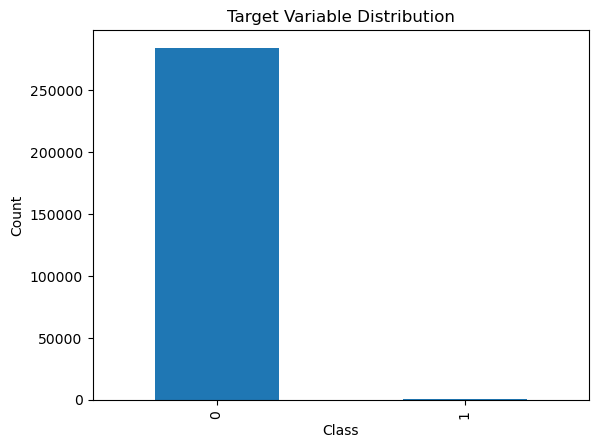

In [48]:
# Visualization of the target variable "Class"
df["Class"].value_counts().plot(kind="bar")
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [50]:
# A 1 as a value means fraud and 0 otherwise 
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# DATA PREPROCESSING

In [53]:
# Is there any missing values?
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
# Is there any duplicated rows?
df.duplicated().sum()

1081

In [63]:
# Are any fraud cases in this duplicated rows?
df[df.duplicated()]["Class"].value_counts()

Class
0    1062
1      19
Name: count, dtype: int64

##### I decide to keep the duplicated rows, because are 19 fraud cases and i'd lose features of fraudulent transactions if i drop this rows.

In [67]:
# Standardize "Amount" and "Time"
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df["Time"] = scaler.fit_transform(df[["Time"]])

In [21]:
# Split features and target variable
X = df.drop("Class", axis=1)
y = df["Class"]

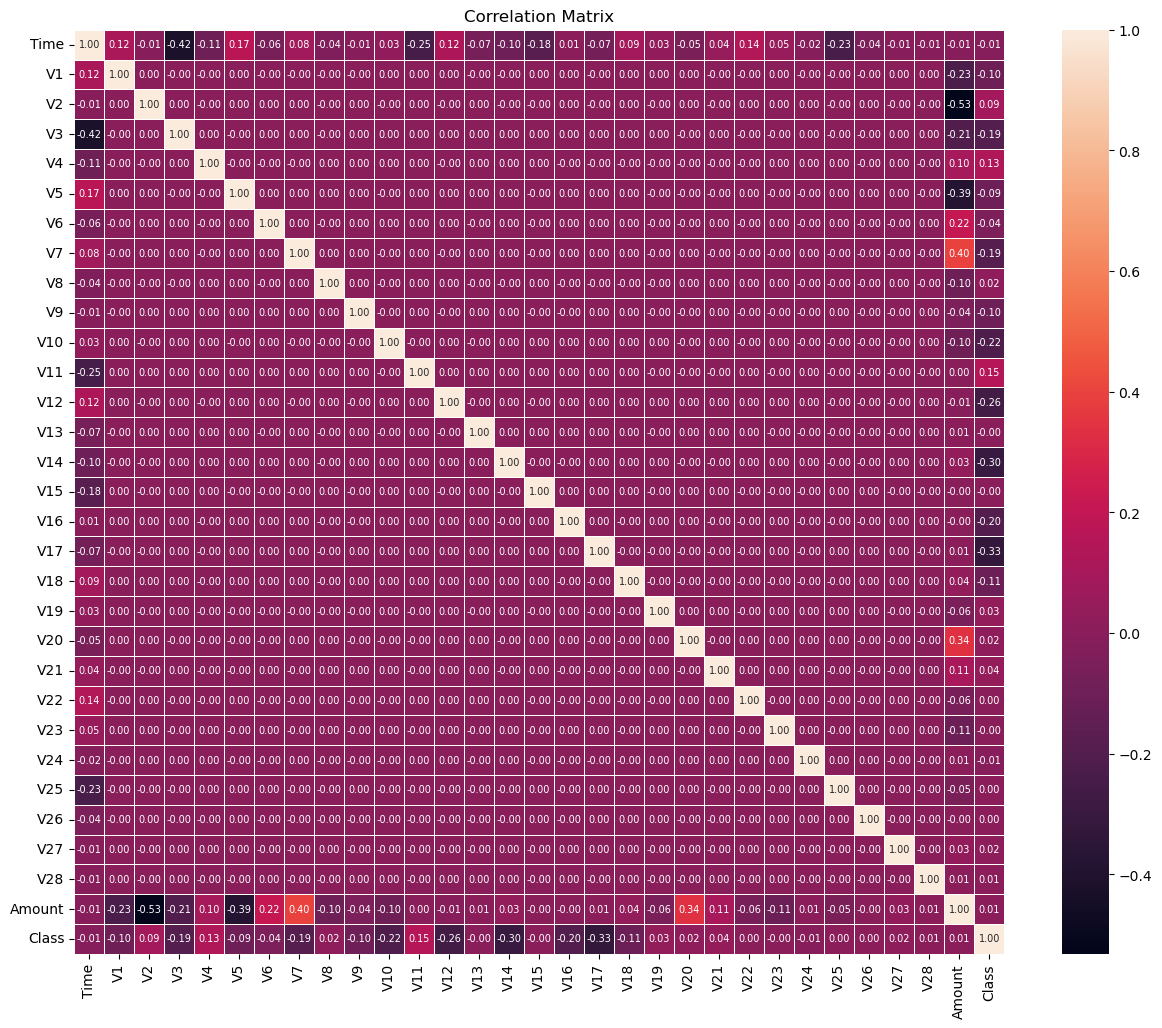

In [135]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size":7})
plt.title("Correlation Matrix")
plt.show()

# SPLIT INTO TRAINING AND TEST SETS

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING AND EVALUATE MODELS

## Logistic Regression

In [125]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [126]:
#Evaluation
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]) 

print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("AUC-ROC:", lr_auc)

Accuracy: 0.9991397773954567
Precision: 0.855072463768116
Recall: 0.6020408163265306
F1-score: 0.7065868263473054
AUC-ROC: 0.9776495009934194


## Decision Tree

In [64]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [65]:
#Evaluation
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_precision = precision_score(y_test, tree_preds)
tree_recall = recall_score(y_test, tree_preds)
tree_f1 = f1_score(y_test, tree_preds)
tree_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]) 

print("Accuracy:", tree_accuracy)
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1-score:", tree_f1)
print("AUC-ROC:", tree_auc)

Accuracy: 0.9990519995786665
Precision: 0.6964285714285714
Recall: 0.7959183673469388
F1-score: 0.7428571428571429
AUC-ROC: 0.8976602247539421


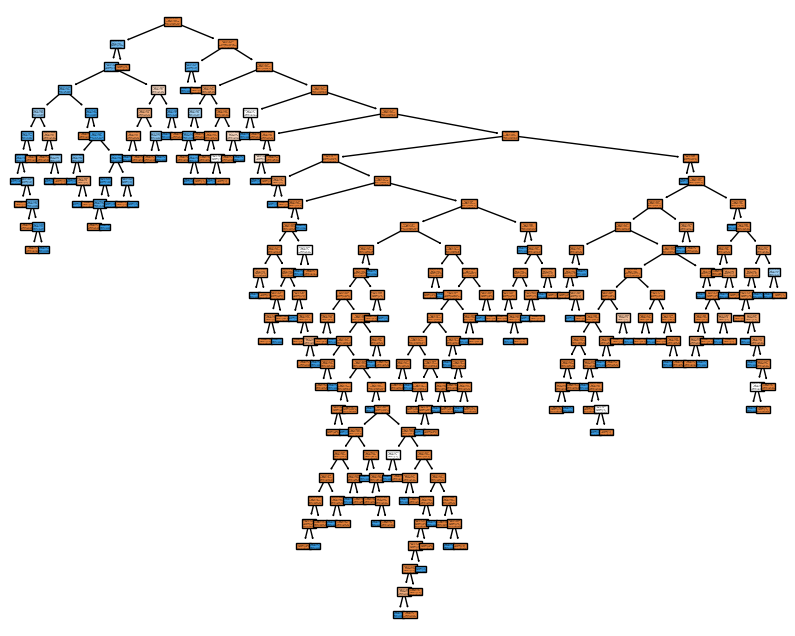

In [66]:
#Decision Tree Visualization
plt.figure(figsize=(10, 8))
plot_tree(tree_model, filled=True, class_names=["Legitimate", "Fraud"])
plt.show()

## Random Forest

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [28]:
#Evaluation
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]) 

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("AUC-ROC:", rf_auc)

Accuracy: 0.999420666409185
Precision: 0.9333333333333333
Recall: 0.7142857142857143
F1-score: 0.8092485549132948
AUC-ROC: 0.9707885194032593


##### I'll use SMOTE to balance the data oversampling the minority class. Remember that are 492 frauds and 284315 legitimate transactions.

In [53]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [59]:
#SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [61]:
# Check new distribution
y_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

##### Now i'll split data and train a new Random Forest Model.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [72]:
new_rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
new_rf_model.fit(X_train, y_train)
new_rf_preds = new_rf_model.predict(X_test)

In [73]:
#Evaluation
new_rf_accuracy = accuracy_score(y_test, new_rf_preds)
new_rf_precision = precision_score(y_test, new_rf_preds)
new_rf_recall = recall_score(y_test, new_rf_preds)
new_rf_f1 = f1_score(y_test, new_rf_preds)
new_rf_auc = roc_auc_score(y_test, new_rf_model.predict_proba(X_test)[:, 1]) 

print("Accuracy:", new_rf_accuracy)
print("Precision:", new_rf_precision)
print("Recall:", new_rf_recall)
print("F1-score:", new_rf_f1)
print("AUC-ROC:", new_rf_auc)

Accuracy: 0.9693297926595501
Precision: 0.9947828017464664
Recall: 0.9437306936253861
F1-score: 0.9685845012069028
AUC-ROC: 0.99536008406662


In [78]:
#Predict data
pred = new_rf_model.predict([[-0.537048658206479, 0.143439889714099, -0.183392503769118, 1.11431734172135, -0.231141593103492, 0.157319533642813, 0.208285480584895, -0.412658363615848, 0.688194839361139, 0.131556716419409, -0.176777475566606, 0.558380215263932, 0.245982314784336, 0.378920741550393, -1.23026920886659, 0.985638981649805, -0.0826489457659122, 0.472815412872246, 0.291392550192558, 0.327413723659176, -0.431645556934317, 0.468463933264899, 0.865819661301423, 0.0533588501956475, 0.300863402736926, 0.457870817299107, -0.277187511646129, 0.198793346946411, 0.281893771983676, 0.103456037914209]])

#Results
if pred == 0:
    print("Legitimate Transaction")
else:
    print("Fraud Transaction")

Legitimate Transaction


C:\Users\Ian Mazzola\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
